# **Proyek Analisis Data: Bike Sharing Dataset**
- Nama: I Gusti Putu Oka Sugiarta
- Email: okasugi09@gmail.com
- Id Dicoding: oka_sugiarta

## **Menentukan Pertanyaan Bisnis**

- Apakah ada hubungan antara cuaca terhadap jumlah permintaan ?
- Bagaimana tren penggunaan sepeda di tahun 2011 dan 2012?
- Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?

## **Menyiapkan semua library yang dibutuhkan**

Sebelum memulai proyek, pastikan kita telah mengimport semua library yang kita butuhkan untuk mengerjakan proyeknya.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## **Data Wrangling**

### **Gathering Data**

Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih **Bike Sharing Dataset**, maka saya mengimpor file **day.csv** dan **hour.csv**

### **Load tabel day**

In [2]:
day_rent_df = pd.read_csv("https://raw.githubusercontent.com/okasugiarta/bike_share_proyek/main/dashboard/day.csv")
day_rent_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **Load tabel hr**

In [3]:
hour_rent_df = pd.read_csv("https://raw.githubusercontent.com/okasugiarta/bike_share_proyek/main/data/hour.csv")
hour_rent_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### **Menilai day_df**

Pertama kita mengecek tipe data day_df

In [4]:
day_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

Kedua kita mengecek apakah terdapat missing value

In [5]:
day_rent_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita simpulkan bahwa tabel day_df tidak ada missing values, berarti aman.

Selanjutnya kita mengecek apakah terdapat duplicate data

In [6]:
print("Jumlah duplikasi data: ", day_rent_df.duplicated().sum())

Jumlah duplikasi data:  0


Pada tabel day_df tidak terdapat duplicate data, artinya semua data bersifat unik.

Selanjutnya kita mengecek apakah terdapat keanehan pada nilai statistiknya

In [7]:
day_rent_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat kita lihat diatas, tidak ada keanehan pada nilai statistiknya.

### **Menilai hr_df**

Pertama Mengecek info hr_df

In [8]:
hour_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

Selanjutnya kita mengecek apakah ada missing values

In [9]:
hour_rent_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Sama seperti tabel day_df bahwa tabel hr_df tidak ada missing values, berarti aman.

Selanjutnya kita mengecek apakah ada duplicate data

In [10]:
print("Jumlah duplikasi data: ", hour_rent_df.duplicated().sum())

Jumlah duplikasi data:  0


Selanjutnya kita mengecek apakah terdapat keanehan pada nilai statistiknya

In [11]:
hour_rent_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat kita lihat diatas, tidak ada keanehan pada nilai statistiknya.

### **Cleaning Data**

1. Menghapus tabel yang tidak diperlukan

In [12]:
del hour_rent_df

2. Menghapus beberapa kolom yang tidak akan digunakan

Berdasarkan pertanyaan bisnis yang sudah ada, maka untuk kolom yang akan didrop, yakni:
- instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.
- windspeed: Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda.

In [13]:
drop_col = ['instant', 'windspeed']

for i in day_rent_df.columns:
  if i in drop_col:
    day_rent_df.drop(labels=i, axis=1, inplace=True)

day_rent_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Mengubah beberapa detail tentang kolom

mengapa ini saya lakukan, ini bertujuan untuk mempermudah mengenali nama kolomnya.

In [14]:
# Mengubah nama judul kolom
day_rent_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_rent_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [15]:
# Mengubah angka menjadi keterangan
day_rent_df['month'] = day_rent_df['month'].map({
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
})
day_rent_df['season'] = day_rent_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_rent_df['weekday'] = day_rent_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
day_rent_df['weather_cond'] = day_rent_df['weather_cond'].map({
    1: 'Cerah/Sebagian Berawan',
    2: 'Berkabut/Berawan',
    3: 'Salju Ringan/Hujan',
    4: 'Cuaca buruk'
})

In [16]:
# Mengubah tipe data ke datetime
day_rent_df['dateday'] = pd.to_datetime(day_rent_df.dateday)

# Mengubaha tipe data ke categorical
day_rent_df['season'] = day_rent_df.season.astype('category')
day_rent_df['year'] = day_rent_df.year.astype('category')
day_rent_df['month'] = day_rent_df.month.astype('category')
day_rent_df['holiday'] = day_rent_df.holiday.astype('category')
day_rent_df['weekday'] = day_rent_df.weekday.astype('category')
day_rent_df['workingday'] = day_rent_df.workingday.astype('category')
day_rent_df['weather_cond'] = day_rent_df.weather_cond.astype('category')

day_rent_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Januari,0,Sabtu,0,Berkabut/Berawan,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Januari,0,Minggu,0,Berkabut/Berawan,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Januari,0,Senin,1,Cerah/Sebagian Berawan,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Januari,0,Selasa,1,Cerah/Sebagian Berawan,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Januari,0,Rabu,1,Cerah/Sebagian Berawan,0.226957,0.229270,0.436957,82,1518,1600


In [17]:
day_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## **Exploratory Data Analysis (EDA)**

### **Eksplorasi Data day_df**

Pertama kita kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan

In [18]:
day_rent_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\OKA\AppData\Local\Temp\ipykernel_3016\3403954821.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_rent_df.groupby(by='month').agg({


count                           
            max   min         mean     sum
month                                     
Agustus    7865  1115  5664.419355  351194
April      7460   795  4484.900000  269094
Desember   6606   441  3403.806452  211036
Februari   5062  1005  2655.298246  151352
Januari    4521   431  2176.338710  134933
Juli       8173  3285  5563.677419  344948
Juni       8120  3767  5772.366667  346342
Maret      8362   605  3692.258065  228920
Mei        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
Oktober    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

Kedua kita kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca

In [19]:
day_rent_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\OKA\AppData\Local\Temp\ipykernel_3016\3818001042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_rent_df.groupby(by='weather_cond').agg({


count                           
                         max  min         mean      sum
weather_cond                                           
Berkabut/Berawan        8362  605  4035.862348   996858
Cerah/Sebagian Berawan  8714  431  4876.786177  2257952
Salju Ringan/Hujan      4639   22  1803.285714    37869

Selanjutnya kita kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan season

In [20]:
day_rent_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

C:\Users\OKA\AppData\Local\Temp\ipykernel_3016\3384790079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_rent_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Selanjutnyakita kelompokkan temp, hum, dan humidity berdasarkan season

In [21]:
day_rent_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

C:\Users\OKA\AppData\Local\Temp\ipykernel_3016\2500072425.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_rent_df.groupby(by='season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Apakah ada hubungan antara cuaca terhadap jumlah pemakaian sepeda?**

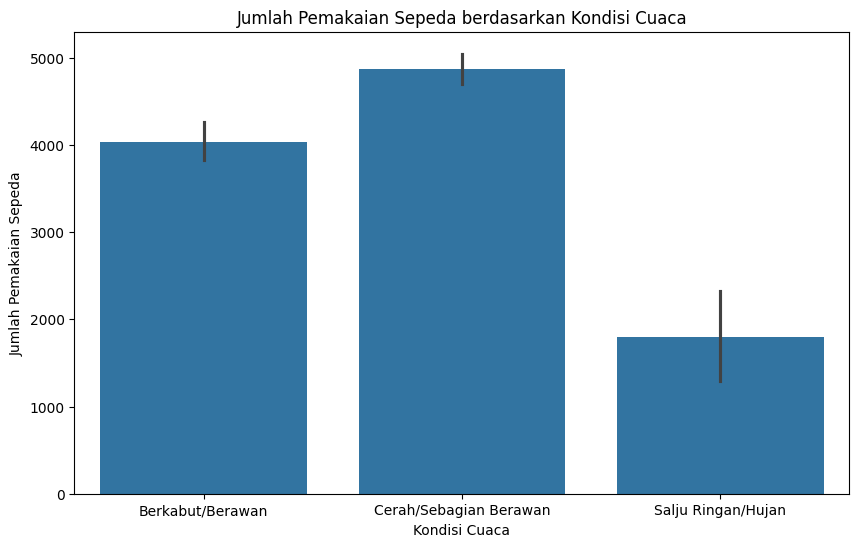

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day_rent_df)

plt.title('Jumlah Pemakaian Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pemakaian Sepeda')
plt.show()

Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan pemakaian sepeda, Kondisi cuaca saat sedang cerah/setengah mendung menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca berkabut/mendung, dan terakhir ketika cuaca sedang sedikit bersalju/hujan menjadi yang paling sedikit diminati.

### **Pertanyaan 2: Bagaimana tren penggunaan sepeda di tahun 2011 dan 2012?**

C:\Users\OKA\AppData\Local\Temp\ipykernel_3016\1563552629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_rent_df.groupby(by=["month","year"]).agg({


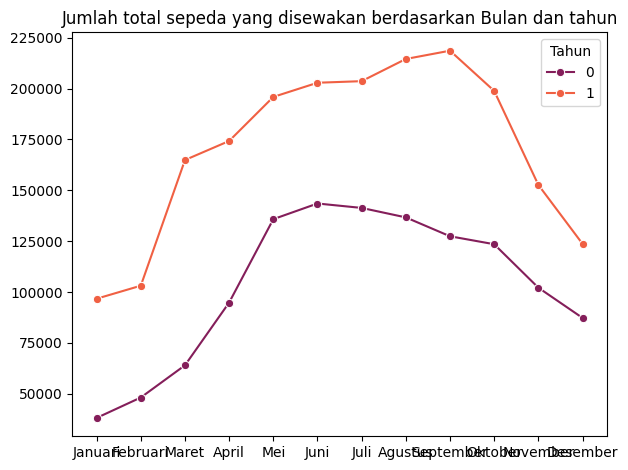

In [23]:
day_rent_df['month'] = pd.Categorical(day_rent_df['month'], categories=
    ['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'],
    ordered=True)

monthly_counts = day_rent_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas menggunakan lineplot, dapat disimpulkan bahwa tahun 2012 (yang diwakili oleh angka 1) jelas menang unggul baik dari januari sampai desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari.

### **Pertanyaan 3: Apakah ada pengaruh musim terhadap pemakaian sepeda berdasarkan pelanggan Casual dan Registered?**

C:\Users\OKA\AppData\Local\Temp\ipykernel_3016\1880620719.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_rent_df.groupby('season')[['registered', 'casual']].sum().reset_index()


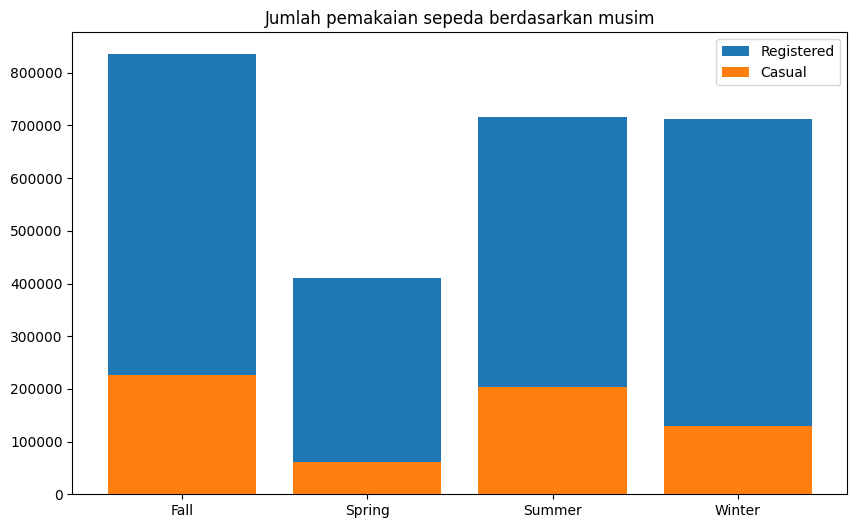

In [25]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_rent_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah pemakaian sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan hasil analisis diatas menggunakan barplot, dapat disimpulkan bahwa di semua musim yang paling dinikmati bagi para pengguna sepeda (Casual dan Registered) adalah musim gugur (Fall), lalu diikuti dengan musim panas (Summer), musim dingin (Winter), dan diakhiri dengan musim semi (Spring).


## **Conclusion**

- Conclusion pertanyaan 1:
Dapat terlihat jelas terdapat hubungan diantara keduanya. Para penyewa sepeda sangat menyukai ketika cuaca sedang Cerah/Sedikit mendung. Lalu posisi kedua ditempati ketika cuaca sedang Berkabut/Mendung. Terakhir pengguna kurang menyukai ketika suasana sedang Sedikit bersalju/Hujan.


- Conclusion pertanyaan 2:
Dapat terlihat jelas pada visualisasi yang dipaparkan, dapat kita amati tren yang terjadi di tahun 2011 dan 2012. Puncak dari tahun 2011 terdapat pada bulan Juni dan yang paling rendah di bulan Januari. sedangkan untuk di tahun 2012 puncaknya terdapat di bulan september dan paling rendah terdapat pada bulan yang sama yakni Januari. Serta dari visualisasi tersebut kita dapat simpulkan bahwa jumlah pemakaian sepeda di tahun 2012 keseluruhannya lebih tinggi dibandingkan di tahun 2011.


- Conclusion pertanyaan 3:
Disini terdapat kesimpulan yang mengejutkan, dimana di musim dingin (winter) ternyata tidak menjadi yang paling rendah, melainkan yang paling rendah adalah musim semi (spring). Sedangkan yang paling tinggi adalah pada saat musm gugur (fall).